## Type 2 Diabetes Hospital Readmission Data Science Project
by Robert Lee

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


df = pd.read_csv("diabetic_data.csv")




EDA

Shape of dataset: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int6

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983457,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


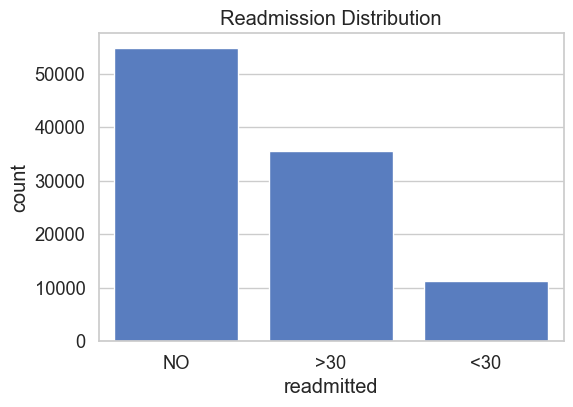

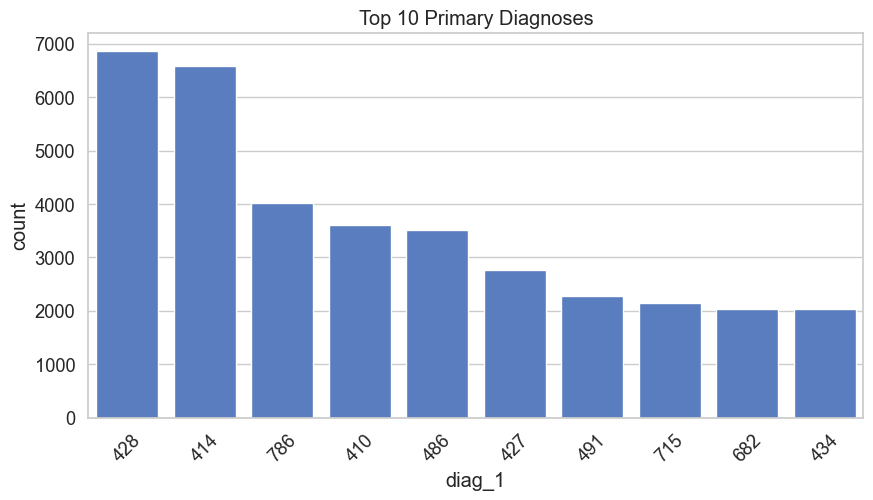

In [ ]:

# Shape of dataset
print("Shape of dataset:", df.shape)

# Preview first rows
display(df.head())

# Info (datatypes, non-null counts)
print("\nData Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe(include="all").transpose())

# --- 4. Quick visualizations ---

# Plot target distribution (readmitted)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="readmitted", order=df["readmitted"].value_counts().index)
plt.title("Readmission Distribution")
plt.show()

# Example: top 10 primary diagnoses
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="diag_1", order=df["diag_1"].value_counts().iloc[:10].index)
plt.title("Top 10 Primary Diagnoses")
plt.xticks(rotation=45)
plt.show()

Unsupervised Machine Learning: K - Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# =========================
# 1. Load dataset
# =========================
df = pd.read_csv("diabetic_data.csv")

# Quick look
print(df.shape)
print(df.head())

# =========================
# 1. Select features
# =========================
# Use demographic + utilization features for clustering
features = [
    "age", 
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses",
    "gender",
    "race"
]

df_clust = df[features].copy()

# =========================
# 3. Handle categorical features
# =========================
# Replace ? with NaN
df_clust = df_clust.replace("?", np.nan)

# Drop missing values (simple approach, could also impute)
df_clust = df_clust.dropna()

# Separate numeric & categorical
num_features = df_clust.select_dtypes(include=np.number).columns.tolist()
cat_features = df_clust.select_dtypes(exclude=np.number).columns.tolist()

# Preprocessor: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

# =========================
# 4. Apply KMeans clustering
# =========================
# Build pipeline
kmeans_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("cluster", KMeans(n_clusters=4, random_state=42))  # try 4 clusters
])

kmeans_pipeline.fit(df_clust)

# Assign cluster labels
df_clust["cluster"] = kmeans_pipeline.named_steps["cluster"].labels_

# =========================
# 5. Explore cluster sizes
# =========================
print(df_clust["cluster"].value_counts())

# =========================
# 6. PCA for visualization (2D)
# =========================
X_transformed = preprocessor.fit_transform(df_clust.drop("cluster", axis=1))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_clust["cluster"], palette="Set2")
plt.title("Patient Clusters (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# =========================
# 7. Interpret cluster centers
# =========================
# Get cluster centers back in feature space
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
feature_names = (
    num_features +
    list(kmeans_pipeline.named_steps["preprocess"].transformers_[1][1].get_feature_names_out(cat_features))
)

cluster_centers = pd.DataFrame(centers, columns=feature_names)
print(cluster_centers[num_features])  # show numeric centers
